<a href="https://colab.research.google.com/github/adindasyv/skripsi_2025/blob/main/fix_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# 1. Load kedua dataset
df_dataset1 = pd.read_csv(r'D:\SKRIPSI\skripsi_2025\fix_dataset\berita_terdahulu_grouping.csv')
df_dataset2 = pd.read_csv(r'D:\SKRIPSI\skripsi_2025\fix_dataset\berita_terkini_dengan_label.csv')

# 2. Sesuaikan nama kolom agar konsisten
# Dataset 1 (berita_terdahulu_grouping.csv) sudah memiliki kolom yang sesuai
# Hanya perlu rename Created_at ke date
df_dataset1 = df_dataset1.rename(columns={'Created_at': 'date'})

# Dataset 2 (berita_terkini_dengan_label.csv) perlu disesuaikan:
# - title -> Title
# - content -> Content
# - predicted_label -> label
# - date tetap date
df_dataset2 = df_dataset2.rename(columns={
    'title': 'Title',
    'content': 'Content',
    'predicted_label': 'label'
})

# 3. Pilih hanya kolom yang dibutuhkan untuk kedua dataset
required_columns = ['Title', 'Content', 'stemmed_text', 'faktor_str', 'label', 'date']

df_dataset1_selected = df_dataset1[required_columns]
df_dataset2_selected = df_dataset2[required_columns]

# 4. Hapus duplikat dan nilai kosong dari kedua dataset
# df_dataset1_clean = df_dataset1_selected.drop_duplicates(subset=['Content'])
# df_dataset1_clean = df_dataset1_clean.dropna(subset=['Content', 'Title'])

# df_dataset2_clean = df_dataset2_selected.drop_duplicates(subset=['Content'])
# df_dataset2_clean = df_dataset2_clean.dropna(subset=['Content', 'Title'])

# 5. Gabungkan kedua dataset (tanpa sampling)
df_combined = pd.concat([df_dataset1_selected, df_dataset2_selected], ignore_index=True)

# 6. Acak dataset gabungan untuk memastikan data tercampur dengan baik
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# 7. Simpan dataset gabungan ke file CSV
df_combined.to_csv('berita_combined.csv', index=False)

# 8. Tampilkan informasi dataset
print(f"Dataset 1 (berita_terdahulu_grouping):")
print(f"  - Data asli: {len(df_dataset1)}")
print(f"  - Setelah cleaning: {len(df_dataset1_selected)}")

print(f"\nDataset 2 (berita_terkini_dengan_label):")
print(f"  - Data asli: {len(df_dataset2)}")
print(f"  - Setelah cleaning: {len(df_dataset2_selected)}")

print(f"\nDataset gabungan:")
print(f"  - Total data: {len(df_combined)}")

print(f"\nKolom-kolom dalam dataset gabungan:")
print(df_combined.columns.tolist())

print(f"\nInfo dataset gabungan:")
print(df_combined.info())

print(f"\nContoh 5 baris pertama dari dataset gabungan:")
print(df_combined.head())

Dataset 1 (berita_terdahulu_grouping):
  - Data asli: 1212
  - Setelah cleaning: 1212

Dataset 2 (berita_terkini_dengan_label):
  - Data asli: 1078
  - Setelah cleaning: 1078

Dataset gabungan:
  - Total data: 2290

Kolom-kolom dalam dataset gabungan:
['Title', 'Content', 'stemmed_text', 'faktor_str', 'label', 'date']

Info dataset gabungan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         2290 non-null   object
 1   Content       2290 non-null   object
 2   stemmed_text  2290 non-null   object
 3   faktor_str    2290 non-null   object
 4   label         2290 non-null   object
 5   date          2290 non-null   object
dtypes: object(6)
memory usage: 107.5+ KB
None

Contoh 5 baris pertama dari dataset gabungan:
                                               Title  \
0  Aliansi Buruh-Tani Ancam Mogok Massal Jika Per...   
1  Terpo

In [ ]:
# Analisis distribusi label dari dataset gabungan
import pandas as pd

# Load dataset gabungan yang sudah dibuat
df_combined = pd.read_csv('berita_combined.csv')

print("=== ANALISIS DISTRIBUSI LABEL ===")

# 1. Distribusi label secara keseluruhan
print(f"\nDataset Gabungan - Distribusi Label:")
label_dist = df_combined['label'].value_counts().sort_index()
print(label_dist)
print(f"Total data: {label_dist.sum()}")

# 2. Persentase distribusi label
print(f"\nDataset Gabungan - Persentase Label:")
label_percentage = df_combined['label'].value_counts(normalize=True).sort_index() * 100
for label, percentage in label_percentage.items():
    count = label_dist[label]
    print(f"  {label}: {count} data ({percentage:.2f}%)")

# 3. Cek apakah ada nilai null di kolom label
null_labels = df_combined['label'].isnull().sum()
print(f"\nJumlah data dengan label kosong: {null_labels}")

# 4. Unique labels yang ada
print(f"\nLabel unik yang tersedia:")
unique_labels = df_combined['label'].unique()
for label in sorted(unique_labels):
    if pd.notna(label):  # Skip jika ada NaN
        print(f"  - {label}")

# 5. Visualisasi sederhana
print(f"\nVisualisasi Distribusi:")
max_count = label_dist.max()
for label in sorted(label_dist.index):
    count = label_dist[label]
    bar_length = int((count / max_count) * 50)  # Scale to 50 characters max
    bar = "█" * bar_length
    print(f"{label:>8}: {bar} ({count})")

=== ANALISIS DISTRIBUSI LABEL ===

Dataset Gabungan - Distribusi Label:
negatif    1542
positif     748
Name: label, dtype: int64
Total data: 2290

Dataset Gabungan - Persentase Label:
  negatif: 1542 data (67.34%)
  positif: 748 data (32.66%)

Jumlah data dengan label kosong: 0

Label unik yang tersedia:
  - negatif
  - positif

Visualisasi Distribusi:
 negatif: ██████████████████████████████████████████████████ (1542)
 positif: ████████████████████████ (748)


In [ ]:
import pandas as pd
from datetime import datetime
import re

# Load dataset gabungan
df = pd.read_csv(r'D:\SKRIPSI\skripsi_2025\fix_dataset\berita_combined.csv')

# Mapping nama bulan Indonesia ke angka
BULAN_INDONESIA = {
    'jan': 1, 'januari': 1,
    'feb': 2, 'februari': 2,
    'mar': 3, 'maret': 3,
    'apr': 4, 'april': 4,
    'mei': 5, 'may': 5,
    'jun': 6, 'juni': 6,
    'jul': 7, 'juli': 7,
    'agu': 8, 'agustus': 8,
    'sep': 9, 'september': 9,
    'okt': 10, 'oktober': 10,
    'nov': 11, 'november': 11,
    'des': 12, 'desember': 12
}

# Mapping nama hari Indonesia (opsional, untuk validasi)
HARI_INDONESIA = {
    'senin': 'monday',
    'selasa': 'tuesday',
    'rabu': 'wednesday',
    'kamis': 'thursday',
    'jumat': 'friday',
    'sabtu': 'saturday',
    'minggu': 'sunday'
}

def standardize_date_complete(date_str):
    """
    Mengkonversi berbagai format tanggal termasuk format Indonesia menjadi dd/mm/yyyy
    """
    if pd.isna(date_str) or date_str == '':
        return None

    # Convert to string dan bersihkan
    date_str = str(date_str).strip()
    original_date_str = date_str

    # Hapus timezone indicator dan WIB
    date_str = re.sub(r'\+\d{2}$', '', date_str)
    date_str = re.sub(r'UTC$', '', date_str)
    date_str = re.sub(r'WIB$', '', date_str)
    date_str = date_str.strip()

    # Penanganan khusus untuk format Indonesia: "Jumat, 20 Des 2024 17:01"
    indonesia_pattern = r'^(\w+),?\s+(\d{1,2})\s+(\w+)\s+(\d{4})(?:\s+\d{1,2}:\d{1,2}(?::\d{1,2})?)?$'
    indonesia_match = re.match(indonesia_pattern, date_str)

    if indonesia_match:
        try:
            hari, tanggal, bulan_str, tahun = indonesia_match.groups()
            bulan_str = bulan_str.lower()

            if bulan_str in BULAN_INDONESIA:
                bulan = BULAN_INDONESIA[bulan_str]
                parsed_date = datetime(int(tahun), bulan, int(tanggal))
                return parsed_date.strftime('%d/%m/%Y')
        except ValueError as e:
            print(f"Error parsing Indonesian date '{original_date_str}': {e}")

    # List format tanggal standar
    date_formats = [
        # Format dengan timezone sudah dihapus
        '%Y-%m-%d %H:%M:%S',    # 2023-03-13 09:18:44
        '%Y-%m-%d %H:%M',       # 2023-03-13 09:18
        '%Y-%m-%d',             # 2023-03-13
        '%Y/%m/%d %H:%M:%S',    # 2023/03/13 09:18:44
        '%Y/%m/%d %H:%M',       # 2023/03/13 09:18
        '%Y/%m/%d',             # 2023/03/13

        # Format d/m/yyyy
        '%d/%m/%Y %H:%M:%S',    # 13/03/2023 09:18:44
        '%d/%m/%Y %H:%M',       # 13/03/2023 09:18
        '%d/%m/%Y',             # 13/03/2023
        '%d-%m-%Y %H:%M:%S',    # 13-03-2023 09:18:44
        '%d-%m-%Y %H:%M',       # 13-03-2023 09:18
        '%d-%m-%Y',             # 13-03-2023

        # Format m/d/yyyy (US format)
        '%m/%d/%Y %H:%M:%S',    # 03/13/2023 09:18:44
        '%m/%d/%Y %H:%M',       # 03/13/2023 09:18
        '%m/%d/%Y',             # 03/13/2023

        # Format tanpa separator
        '%Y%m%d',               # 20230313

        # Format dengan nama bulan Inggris
        '%d-%b-%Y',             # 13-Mar-2023
        '%d %B %Y',             # 13 March 2023
        '%B %d, %Y',            # March 13, 2023
        '%d %b %Y',             # 13 Mar 2023
    ]

    # Coba parsing dengan berbagai format
    for fmt in date_formats:
        try:
            parsed_date = datetime.strptime(date_str, fmt)
            return parsed_date.strftime('%d/%m/%Y')
        except ValueError:
            continue

    # Penanganan khusus untuk format dengan angka tanpa leading zero
    patterns = [
        # yyyy-m-d atau yyyy/m/d
        (r'^(\d{4})[-/](\d{1,2})[-/](\d{1,2})(?:\s+\d{1,2}:\d{1,2}(?::\d{1,2})?)?$', 'yyyy-mm-dd'),
        # m/d/yyyy dengan atau tanpa waktu (US format)
        (r'^(\d{1,2})/(\d{1,2})/(\d{4})(?:\s+\d{1,2}:\d{1,2}(?::\d{1,2})?)?$', 'mm/dd/yyyy'),
        # d-m-yyyy atau d/m/yyyy
        (r'^(\d{1,2})[-/](\d{1,2})[-/](\d{4})(?:\s+\d{1,2}:\d{1,2}(?::\d{1,2})?)?$', 'dd-mm-yyyy'),
    ]

    for pattern, format_type in patterns:
        match = re.match(pattern, date_str)
        if match:
            groups = match.groups()
            try:
                if format_type == 'yyyy-mm-dd':
                    year, month, day = groups
                elif format_type == 'mm/dd/yyyy':
                    month, day, year = groups
                else:  # dd-mm-yyyy
                    day, month, year = groups

                # Validasi tanggal
                parsed_date = datetime(int(year), int(month), int(day))
                return parsed_date.strftime('%d/%m/%Y')
            except ValueError:
                # Jika gagal, mungkin format US (m/d/yyyy) salah interpretasi
                if format_type == 'dd-mm-yyyy':
                    try:
                        # Coba sebagai US format (m/d/yyyy)
                        month, day, year = groups
                        parsed_date = datetime(int(year), int(month), int(day))
                        return parsed_date.strftime('%d/%m/%Y')
                    except ValueError:
                        continue
                continue

    # Jika semua gagal, return nilai asli
    print(f"Warning: Could not parse date '{original_date_str}', keeping original value")
    return original_date_str

# Backup data asli jika belum ada
if 'date_original' not in df.columns:
    print("Membuat backup kolom date asli...")
    df['date_original'] = df['date'].copy()

# Test beberapa contoh format Indonesia
print("=== TEST FORMAT INDONESIA ===")
test_dates = [
    "Jumat, 20 Des 2024 17:01 WIB",
    "Rabu, 26 Jun 2024 19:17 WIB",
    "Senin, 13 Mei 2024 19:57 WIB"
]

print("Test konversi format Indonesia:")
for test_date in test_dates:
    result = standardize_date_complete(test_date)
    print(f"  {test_date} → {result}")

# Konversi format tanggal dengan fungsi lengkap
print("\n=== MELAKUKAN KONVERSI DENGAN DUKUNGAN FORMAT INDONESIA ===")
print("Mengkonversi ke format dd/mm/yyyy...")

df['date'] = df['date_original'].apply(standardize_date_complete)

# Cek hasil konversi
print("\n=== HASIL KONVERSI ===")
print("Sample tanggal setelah konversi:")
sample_dates_new = df['date'].dropna().head(15).tolist()
for i, date in enumerate(sample_dates_new, 1):
    print(f"{i:2d}. {date}")

# Validasi hasil konversi
print(f"\nTotal data dengan tanggal setelah konversi: {df['date'].notna().sum()}")
print(f"Total data tanpa tanggal setelah konversi: {df['date'].isna().sum()}")

# Cek apakah ada tanggal yang tidak terkonversi dengan benar
non_standard_dates = []
successfully_converted = 0

for date in df['date'].dropna():
    if re.match(r'^\d{2}/\d{2}/\d{4}$', str(date)):
        successfully_converted += 1
    else:
        non_standard_dates.append(date)

# Hitung tingkat keberhasilan konversi
total_dates = len(df['date'].dropna())
success_rate = (successfully_converted / total_dates * 100) if total_dates > 0 else 0

print(f"\nTingkat keberhasilan konversi: {success_rate:.1f}% ({successfully_converted}/{total_dates})")

if non_standard_dates:
    print(f"\nPeringatan: {len(non_standard_dates)} tanggal masih tidak sesuai format dd/mm/yyyy:")
    # Ambil sample unik untuk analisis
    unique_non_standard = list(set(non_standard_dates))[:10]
    for date in unique_non_standard:
        print(f"  - {date}")
    if len(unique_non_standard) > 10:
        print(f"  ... dan {len(unique_non_standard) - 10} format lainnya")
else:
    print(f"\n✅ Semua tanggal berhasil dikonversi ke format dd/mm/yyyy")

# Simpan dataset dengan tanggal yang sudah distandarisasi
df.to_csv('berita_combined_standardized_date.csv', index=False)
print(f"\n✅ Dataset dengan tanggal terstandarisasi disimpan ke: 'berita_combined_standardized_date.csv'")

# Tampilkan contoh perbandingan
print(f"\n=== SAMPLE PERBANDINGAN SEBELUM DAN SESUDAH ===")
comparison_sample = df[['date_original', 'date']].head(20)
for idx, row in comparison_sample.iterrows():
    original = str(row['date_original'])
    converted = str(row['date'])
    status = "✅" if re.match(r'^\d{2}/\d{2}/\d{4}$', converted) else "❌"
    # Potong teks jika terlalu panjang
    original_short = original[:40] + "..." if len(original) > 40 else original
    converted_short = converted[:40] + "..." if len(converted) > 40 else converted
    print(f"{status} {original_short:<43} → {converted_short}")

# Analisis format bermasalah yang tersisa
if non_standard_dates:
    print(f"\n=== ANALISIS FORMAT YANG MASIH BERMASALAH ===")
    problem_categories = {
        'Format Indonesia belum tertangani': 0,
        'Format dengan timezone kompleks': 0,
        'Format ambiguous': 0,
        'Format tidak dikenal': 0
    }

    sample_problems = unique_non_standard[:20]  # Ambil sample untuk analisis
    for date_str in sample_problems:
        date_str = str(date_str)
        if any(bulan in date_str.lower() for bulan in BULAN_INDONESIA.keys()):
            problem_categories['Format Indonesia belum tertangani'] += 1
        elif '+' in date_str or 'GMT' in date_str or 'UTC' in date_str:
            problem_categories['Format dengan timezone kompleks'] += 1
        elif '/' in date_str and len(date_str.split('/')) == 3:
            problem_categories['Format ambiguous'] += 1
        else:
            problem_categories['Format tidak dikenal'] += 1

    print("Kategori masalah yang tersisa:")
    for category, count in problem_categories.items():
        if count > 0:
            print(f"  - {category}: {count} kasus")

# Informasi tambahan tentang bulan Indonesia yang didukung
print(f"\n=== FORMAT INDONESIA YANG DIDUKUNG ===")
print("Bulan yang dapat dikonversi:")
bulan_list = list(BULAN_INDONESIA.keys())
for i in range(0, len(bulan_list), 6):
    print(f"  {', '.join(bulan_list[i:i+6])}")

print(f"\nContoh format yang didukung:")
print(f"  - Jumat, 20 Des 2024 17:01 WIB")
print(f"  - Senin, 15 Jan 2024 10:30")
print(f"  - Rabu, 05 Februari 2024")

Membuat backup kolom date asli...
=== TEST FORMAT INDONESIA ===
Test konversi format Indonesia:
  Jumat, 20 Des 2024 17:01 WIB → 20/12/2024
  Rabu, 26 Jun 2024 19:17 WIB → 26/06/2024
  Senin, 13 Mei 2024 19:57 WIB → 13/05/2024

=== MELAKUKAN KONVERSI DENGAN DUKUNGAN FORMAT INDONESIA ===
Mengkonversi ke format dd/mm/yyyy...

=== HASIL KONVERSI ===
Sample tanggal setelah konversi:
 1. 15/03/2023
 2. 15/03/2023
 3. 30/08/2024
 4. 02/05/2023
 5. 27/03/2023
 6. 06/07/2024
 7. 28/03/2023
 8. 21/03/2023
 9. 06/04/2023
10. 10/12/2022
11. 21/11/2024
12. 09/01/2024
13. 20/12/2024
14. 17/11/2023
15. 07/12/2023

Total data dengan tanggal setelah konversi: 2288
Total data tanpa tanggal setelah konversi: 2

Tingkat keberhasilan konversi: 100.0% (2288/2288)

✅ Semua tanggal berhasil dikonversi ke format dd/mm/yyyy

✅ Dataset dengan tanggal terstandarisasi disimpan ke: 'berita_combined_standardized_date.csv'

=== SAMPLE PERBANDINGAN SEBELUM DAN SESUDAH ===
✅ 2023-03-15 00:32:32+00                     

In [ ]:
import pandas as pd
from datetime import datetime
import re

# Load dataset yang sudah distandarisasi tanggalnya
df = pd.read_csv(r'D:\SKRIPSI\skripsi_2025\fix_dataset\berita_combined_standardized_date.csv')

print(f"=== SORTING DATA BERDASARKAN TANGGAL (2020-2024) ===")
print(f"Total data awal: {len(df)}")

# Fungsi untuk convert tanggal dd/mm/yyyy ke datetime
def parse_date_to_datetime(date_str):
    """
    Convert format dd/mm/yyyy ke datetime object
    """
    if pd.isna(date_str) or date_str == '':
        return None

    date_str = str(date_str).strip()

    # Cek apakah sudah format dd/mm/yyyy
    if re.match(r'^\d{2}/\d{2}/\d{4}$', date_str):
        try:
            return datetime.strptime(date_str, '%d/%m/%Y')
        except ValueError:
            return None

    # Jika belum format standar, coba parse format lain
    formats_to_try = [
        '%Y-%m-%d',           # 2024-01-15
        '%Y/%m/%d',           # 2024/01/15
        '%d-%m-%Y',           # 15-01-2024
        '%m/%d/%Y',           # 01/15/2024
        '%Y-%m-%d %H:%M:%S',  # 2024-01-15 10:30:45
        '%d/%m/%Y %H:%M:%S',  # 15/01/2024 10:30:45
    ]

    for fmt in formats_to_try:
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue

    return None

# Convert kolom date ke datetime
print("Mengkonversi tanggal ke format datetime...")
df['date_datetime'] = df['date'].apply(parse_date_to_datetime)

# Cek berapa yang berhasil dikonversi
converted_count = df['date_datetime'].notna().sum()
print(f"Berhasil mengkonversi {converted_count} dari {len(df)} tanggal ke datetime")

# Filter data untuk tahun 2020-2024
print("\nMemfilter data untuk tahun 2020-2024...")
df_with_date = df[df['date_datetime'].notna()].copy()

# Filter berdasarkan tahun
df_filtered = df_with_date[
    (df_with_date['date_datetime'].dt.year >= 2020) &
    (df_with_date['date_datetime'].dt.year <= 2024)
].copy()

print(f"Data setelah filter tahun 2020-2024: {len(df_filtered)}")

# Analisis distribusi per tahun sebelum sorting
print(f"\n=== DISTRIBUSI DATA PER TAHUN ===")
year_distribution = df_filtered['date_datetime'].dt.year.value_counts().sort_index()
for year, count in year_distribution.items():
    print(f"  {year}: {count} data")

# Sort berdasarkan tanggal dari terbaru ke lama (descending)
print(f"\nMengurutkan data dari tanggal terbaru ke lama...")
df_sorted = df_filtered.sort_values('date_datetime', ascending=False).reset_index(drop=True)

# Hapus kolom helper datetime jika tidak diperlukan
df_final = df_sorted.drop('date_datetime', axis=1)

print(f"\n=== HASIL SORTING ===")
print(f"Total data final: {len(df_final)}")

# Tampilkan sample 10 data teratas (terbaru)
print(f"\n10 Data Terbaru:")
sample_newest = df_final[['Title', 'date']].head(10)
for idx, row in sample_newest.iterrows():
    title_short = str(row['Title'])[:50] + "..." if len(str(row['Title'])) > 50 else str(row['Title'])
    print(f"  {idx+1:2d}. [{row['date']}] {title_short}")

# Tampilkan sample 10 data terlama
print(f"\n10 Data Terlama:")
sample_oldest = df_final[['Title', 'date']].tail(10)
for idx, row in sample_oldest.iterrows():
    title_short = str(row['Title'])[:50] + "..." if len(str(row['Title'])) > 50 else str(row['Title'])
    relative_idx = len(df_final) - (len(df_final) - idx - 1)
    print(f"  {relative_idx:2d}. [{row['date']}] {title_short}")

# Cek tanggal terbaru dan terlama
if len(df_sorted) > 0:
    newest_date = df_sorted['date_datetime'].iloc[0]
    oldest_date = df_sorted['date_datetime'].iloc[-1]
    print(f"\nRentang waktu data:")
    print(f"  Terbaru: {newest_date.strftime('%d/%m/%Y')} ({newest_date.strftime('%A, %d %B %Y')})")
    print(f"  Terlama: {oldest_date.strftime('%d/%m/%Y')} ({oldest_date.strftime('%A, %d %B %Y')})")

# Analisis distribusi per bulan tahun terbaru
if len(df_sorted) > 0:
    latest_year = df_sorted['date_datetime'].iloc[0].year
    print(f"\n=== DISTRIBUSI BULAN TAHUN {latest_year} ===")
    latest_year_data = df_sorted[df_sorted['date_datetime'].dt.year == latest_year]
    if len(latest_year_data) > 0:
        month_dist = latest_year_data['date_datetime'].dt.month.value_counts().sort_index()
        month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun',
                      'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des']
        for month, count in month_dist.items():
            print(f"  {month_names[month-1]} {latest_year}: {count} data")

# Simpan data yang sudah diurutkan
output_filename = 'berita_sorted_2020_2024.csv'
df_final.to_csv(output_filename, index=False)
print(f"\n✅ Data yang sudah diurutkan berdasarkan tanggal disimpan ke: '{output_filename}'")

# Validasi akhir
print(f"\n=== VALIDASI AKHIR ===")
print(f"✅ Data diurutkan dari: {year_distribution.index.max()} hingga {year_distribution.index.min()}")
print(f"✅ Total data: {len(df_final)}")
print(f"✅ Kolom yang tersimpan: {list(df_final.columns)}")

# Cek apakah ada duplikat berdasarkan content
duplicates = df_final.duplicated(subset=['Content']).sum()
if duplicates > 0:
    print(f"⚠️  Terdeteksi {duplicates} data duplikat berdasarkan content")
    print(f"   Jika ingin menghapus duplikat, jalankan: df_final.drop_duplicates(subset=['Content'], inplace=True)")
else:
    print(f"✅ Tidak ada duplikat berdasarkan content")

=== SORTING DATA BERDASARKAN TANGGAL (2020-2024) ===
Total data awal: 2290
Mengkonversi tanggal ke format datetime...
Berhasil mengkonversi 2288 dari 2290 tanggal ke datetime

Memfilter data untuk tahun 2020-2024...
Data setelah filter tahun 2020-2024: 2279

=== DISTRIBUSI DATA PER TAHUN ===
  2020: 29 data
  2021: 19 data
  2022: 68 data
  2023: 970 data
  2024: 1193 data

Mengurutkan data dari tanggal terbaru ke lama...

=== HASIL SORTING ===
Total data final: 2279

10 Data Terbaru:
   1. [31/12/2024] Prabowo Ungkap Alasan Umumkan Sendiri Kenaikan PPN...
   2. [31/12/2024] Harga BBM di Tahun 2025 Bakal Turun? Begini Perkir...
   3. [31/12/2024] Geger Jutaan Masyarakat Kelas Menengah RI Turun Ka...
   4. [31/12/2024] Drama Rupiah: Ketika Jokowi Ketar-ketir Gegara Dol...
   5. [31/12/2024] Respons Maman soal Dampak Kebijakan Proteksionisme...
   6. [31/12/2024] 10 Negara dengan Harga Rumah Paling Mahal di Dunia...
   7. [31/12/2024] Waka DPR sebut Kenaikan PPN 12% Amanat UU, Tak Aka...

In [ ]:
df_final.drop_duplicates(subset=['Content'], inplace=True)

## WORD EMBEDDING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from tqdm import tqdm

In [ ]:
from gensim.models import FastText
import nltk
nltk.download('punkt', quiet=True)

True

In [ ]:
df = pd.read_csv(r'D:\SKRIPSI\skripsi_2025\fix_dataset\berita_combined_2020-2024.csv')
df

,Title,Content,stemmed_text,faktor_str,label,date
0,Prabowo Ungkap Alasan Umumkan Sendiri Kenaikan...,Presiden Prabowo Subianto mengumumkan kenaikan...,presiden prabowo subianto umum naik tarif ppn ...,"['suku_bunga', 'ekspor']",negatif,31/12/2024
1,Harga BBM di Tahun 2025 Bakal Turun? Begini Pe...,"Jakarta, CNBC Indonesia - Direktur Center of E...",jakarta cnbc indonesia direktur center of econ...,['suku_bunga'],positif,31/12/2024
2,Geger Jutaan Masyarakat Kelas Menengah RI Turu...,Jumlah kelas menengah di Indonesia terus menga...,kelas tengah indonesia alami turun dasar data ...,"['suku_bunga', 'ekspor']",negatif,31/12/2024
3,Drama Rupiah: Ketika Jokowi Ketar-ketir Gegara...,Nilai tukar dolar Amerika Serikat (AS) menunju...,nilai tukar dolar amerika serikat as dominasi ...,"['suku_bunga', 'impor', 'ekspor']",negatif,31/12/2024
4,Respons Maman soal Dampak Kebijakan Proteksion...,"Menteri Usaha Mikro, Kecil, dan Menengah (UMKM...",menteri usaha mikro tengah umkm maman abdurrah...,"['suku_bunga', 'impor', 'ekspor']",negatif,31/12/2024
...,...,...,...,...,...,...
2274,"Reli Saat Injury Time, IHSG Berhasil Ditutup N...","Jakarta, CNBC Indonesia - Indeks Harga Saham G...",jakarta cnbc indonesia indeks harga saham gabu...,['suku_bunga'],positif,7/1/2020
2275,"Reli Wall Street Berlanjut, IHSG Berpeluang Hi...","Jakarta, CNBC Indonesia - Kinerja Indeks Harga...",jakarta cnbc indonesia kerja indeks harga saha...,['suku_bunga'],positif,7/1/2020
2276,"Asing Masih Kabur, IHSG Dibuka Hijau tapi Malu...","Jakarta, CNBC Indonesia - Indeks Harga Saham G...",jakarta cnbc indonesia indeks harga saham gabu...,['suku_bunga'],positif,7/1/2020
2277,Sikat 2 Tambang Asing & Aksi Hebat Bin Mantap ...,"Jakarta, CNBC Indonesia - Presiden Joko Widodo...",jakarta cnbc indonesia presiden joko widodo jo...,"['suku_bunga', 'ekspor']",positif,22/06/2020


In [ ]:
def tokenize_text(text):
    if isinstance(text, str):
        return text.split()
    return []
tokenized_docs = [tokenize_text(text) for text in df['stemmed_text']]

for i in range(min(5, len(tokenized_docs))):
    print(f"Dokumen {i+1}: {tokenized_docs[i][:10]}...")

Dokumen 1: ['presiden', 'prabowo', 'subianto', 'umum', 'naik', 'tarif', 'ppn', 'belas', 'laku', 'barang']...
Dokumen 2: ['jakarta', 'cnbc', 'indonesia', 'direktur', 'center', 'of', 'economic', 'and', 'law', 'studies']...
Dokumen 3: ['kelas', 'tengah', 'indonesia', 'alami', 'turun', 'dasar', 'data', 'badan', 'pusat', 'statistik']...
Dokumen 4: ['nilai', 'tukar', 'dolar', 'amerika', 'serikat', 'as', 'dominasi', 'rupiah', 'ribu', 'puluh']...
Dokumen 5: ['menteri', 'usaha', 'mikro', 'tengah', 'umkm', 'maman', 'abdurrahman', 'sebut', 'sektor', 'ekspor']...


In [ ]:
# Melatih model FastText
vector_size = 100  # dimensi vektor
window = 5         # ukuran jendela konteks
min_count = 2      # frekuensi kata minimum
workers = 4        # jumlah thread
sg = 1             # Skip-gram (1) vs CBOW (0)
epochs = 20        # jumlah epoch pelatihan

# Latih model
model_ft = FastText(
    tokenized_docs,
    vector_size=vector_size,
    window=window,
    min_count=min_count,
    workers=workers,
    sg=sg,
    epochs=epochs
)

In [ ]:
# memeriksa hasil model
kata_kunci = ['krisis', 'ekonomi', 'moneter', 'inflasi', 'ekspor', 'impor', 'bunga'] #periksa kata yang mirip
print("\nKata-kata yang serupa dengan kata kunci:")
for kata in kata_kunci:
    try:
        similar_words = model_ft.wv.most_similar(kata, topn=5)
        print(f"\nKata yang mirip dengan '{kata}':")
        for word, similarity in similar_words:
            print(f"  {word}: {similarity:.4f}")
    except KeyError:
        print(f"\n'{kata}' tidak ditemukan dalam kosakata model")


Kata-kata yang serupa dengan kata kunci:

Kata yang mirip dengan 'krisis':
  delapankrisis: 0.7808
  crisis: 0.7527
  krismo: 0.7510
  krismon: 0.7460
  subprime: 0.6693

Kata yang mirip dengan 'ekonomi':
  ekonomis: 0.8021
  geoekonomi: 0.7964
  tumbuh: 0.7199
  makroekonomi: 0.7026
  indikatortingkatpertumbuhan: 0.6460

Kata yang mirip dengan 'moneter':
  nonmoneter: 0.7362
  monetari: 0.6883
  monetisasi: 0.6651
  bijak: 0.6415
  krismon: 0.6356

Kata yang mirip dengan 'inflasi':
  asinflasi: 0.8844
  disinflasi: 0.7756
  ihk: 0.7121
  hiperinflasi: 0.7016
  landai: 0.7011

Kata yang mirip dengan 'ekspor':
  eksportir: 0.7336
  nonmigas: 0.6985
  eksporpelemahan: 0.6648
  ekspos: 0.6386
  bauksit: 0.6317

Kata yang mirip dengan 'impor':
  imporhal: 0.7833
  import: 0.7449
  importasi: 0.7355
  importer: 0.7323
  importir: 0.6732

Kata yang mirip dengan 'bunga':
  suku: 0.9297
  acu: 0.7491
  mangkas: 0.6856
  fedpada: 0.6854
  agresif: 0.6854


In [ ]:
# konversi dokumen ke vektor
def get_document_vector(doc_tokens, model):
    """Mengkonversi dokumen (list token) menjadi vektor dengan rata-rata vektor token"""
    vec = np.zeros(model.vector_size)
    count = 0
    for token in doc_tokens:
        try:
            vec += model.wv[token]
            count += 1
        except KeyError:
            continue
    if count > 0:
        vec /= count
    return vec
# konversi dokumen ke vektor
doc_vectors = []
for doc in tqdm(tokenized_docs):
    doc_vectors.append(get_document_vector(doc, model_ft))
# mengubah ke array numpy
doc_vectors = np.array(doc_vectors)
print(f"Bentuk vektor dokumen: {doc_vectors.shape}")

100%|██████████| 2279/2279 [00:21<00:00, 104.13it/s]

Bentuk vektor dokumen: (2279, 100)


In [ ]:
# simpan model dan vektor
model_ft.save("model_fasttext_berita.bin")
with open("doc_vectors_fasttext_terbaru.pkl", "wb") as f:
    pickle.dump(doc_vectors, f)

In [ ]:
# visualisasi dengan t-sne
from sklearn.manifold import TSNE

label_map = {'positif': 1, 'negatif': 0} #split berdasarkan label sentimen
y = df['label'].map(label_map).values
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
vectors_tsne = tsne.fit_transform(doc_vectors)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    vectors_tsne[:, 0],
    vectors_tsne[:, 1],
    c=y,
    cmap='coolwarm',
    alpha=0.7,
    s=50
)
plt.colorbar(scatter, label='Label (1=positif, 0=negatif)')
plt.title('Visualisasi t-SNE dari Vektor Dokumen FastText berdasarkan Sentimen', fontsize=12)
plt.xlabel('Dimensi 1', fontsize=12)
plt.ylabel('Dimensi 2', fontsize=12)
plt.tight_layout()
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

In [1]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import ast

with open("D:\SKRIPSI\skripsi_2025\doc_vectors_fasttext_terbaru.pkl", "rb") as f:
    X_embeddings = pickle.load(f)

# Muat data yang sudah dikelompokkan untuk mendapatkan label faktor
# File ini disimpan pada sel ke-28 pada notebook Anda
df_labels_source = pd.read_csv(r'D:\SKRIPSI\skripsi_2025\fix_dataset\berita_combined_2020-2024.csv')

# Pastikan jumlah baris X_embeddings sesuai dengan df_labels_source
print(f"Bentuk X_embeddings: {X_embeddings.shape}")
print(f"Jumlah baris df_labels_source: {len(df_labels_source)}")

if X_embeddings.shape[0] != len(df_labels_source):
    print("PERINGATAN: Jumlah dokumen di embeddings tidak sama dengan jumlah baris di file label!")

def parse_faktor_str(faktor_str):
    try:
        return ast.literal_eval(faktor_str)
    except ValueError:
        return []

df_labels_source['faktor_list'] = df_labels_source['faktor_str'].apply(parse_faktor_str)

faktor_list = ['suku_bunga', 'impor', 'ekspor']

y_targets = {}
for faktor in faktor_list:
    y_targets[faktor] = df_labels_source['faktor_list'].apply(lambda x: 1 if faktor in x else 0).values

print(f"\nContoh y_target untuk suku_bunga (10 data pertama): {y_targets['suku_bunga'][:10]}")
print(f"Distribusi kelas untuk suku_bunga: \n{pd.Series(y_targets['suku_bunga']).value_counts()}")

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\SKRIPSI\\skripsi_2025\\doc_vectors_fasttext_terbaru.pkl'

In [ ]:

import pandas as pd
import numpy as np
import pickle
import ast
from datetime import datetime
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score)
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
try:
    df_combined = pd.read_csv(r'D:\SKRIPSI\skripsi_2025\fix_dataset\berita_combined_2020-2024.csv')
    print(f"Dataset berhasil dimuat: {len(df_combined)} baris")
except FileNotFoundError:
    print("File berita_sorted_2020_2024.csv tidak ditemukan!")
    raise

# Load word embeddings
try:
    with open("D:\SKRIPSI\skripsi_2025\doc_vectors_fasttext_terbaru.pkl", "rb") as f:
        X_embeddings = pickle.load(f)
    print(f"Word embeddings dimuat: {X_embeddings.shape}")
except FileNotFoundError:
    print("File doc_vectors_fasttext_terbaru.pkl tidak ditemukan!")
    raise

# Validasi ukuran data
if len(df_combined) != X_embeddings.shape[0]:
    print(f"PERINGATAN: Ukuran data tidak sesuai!")
    print(f"DataFrame: {len(df_combined)}, Embeddings: {X_embeddings.shape[0]}")
    # Ambil jumlah minimum untuk sinkronisasi
    min_size = min(len(df_combined), X_embeddings.shape[0])
    df_combined = df_combined.iloc[:min_size].reset_index(drop=True)
    X_embeddings = X_embeddings[:min_size]
    print(f"   Data disinkronkan ke: {min_size} sampel")


Dataset berhasil dimuat: 2279 baris
Word embeddings dimuat: (2279, 100)


In [ ]:
def parse_date(date_str):
    """Parse berbagai format tanggal ke datetime"""
    if pd.isna(date_str):
        return None

    try:
        # Format dd/mm/yyyy
        return datetime.strptime(str(date_str), '%d/%m/%Y')
    except:
        try:
            # Format lain jika ada
            return pd.to_datetime(str(date_str))
        except:
            return None

df_combined['date_parsed'] = df_combined['date'].apply(parse_date)
df_combined = df_combined.dropna(subset=['date_parsed'])

# Sorting ulang berdasarkan tanggal untuk memastikan urutan temporal
df_combined = df_combined.sort_values('date_parsed').reset_index(drop=True)
X_embeddings = X_embeddings[df_combined.index.values]

print(f"Data setelah preprocessing: {len(df_combined)} sampel")
print(f"Rentang tanggal: {df_combined['date_parsed'].min()} hingga {df_combined['date_parsed'].max()}")

# Konversi label ke numerik
label_mapping = {'positif': 1, 'negatif': 0}
y_labels = df_combined['label'].map(label_mapping)

# Cek jika ada label yang tidak dikenali
if y_labels.isnull().any():
    print(f"Ada {y_labels.isnull().sum()} label yang tidak dikenali")
    # Hapus sampel dengan label tidak dikenali
    valid_mask = y_labels.notna()
    df_combined = df_combined[valid_mask].reset_index(drop=True)
    X_embeddings = X_embeddings[valid_mask]
    y_labels = y_labels[valid_mask].astype(int)

print(f"Distribusi label:")
label_counts = pd.Series(y_labels).value_counts()
for label_num, count in label_counts.items():
    label_name = 'positif' if label_num == 1 else 'negatif'
    percentage = count / len(y_labels) * 100
    print(f"  {label_name}: {count} ({percentage:.1f}%)")

Data setelah preprocessing: 2279 sampel
Rentang tanggal: 2020-01-07 00:00:00 hingga 2024-12-31 00:00:00
Distribusi label:
  negatif: 1535 (67.4%)
  positif: 744 (32.6%)


In [ ]:
# Bagi data berdasarkan tanggal (80% pertama untuk training, 20% terakhir untuk testing)
split_point = int(0.8 * len(df_combined))

X_train = X_embeddings[:split_point]
X_test = X_embeddings[split_point:]
y_train = y_labels.iloc[:split_point].values
y_test = y_labels.iloc[split_point:].values

train_dates = df_combined['date_parsed'].iloc[:split_point]
test_dates = df_combined['date_parsed'].iloc[split_point:]

print(f"Training set: {len(X_train)} sampel")
print(f"  Periode: {train_dates.min()} hingga {train_dates.max()}")
print(f"  Distribusi: {np.bincount(y_train)}")

print(f"Testing set: {len(X_test)} sampel")
print(f"  Periode: {test_dates.min()} hingga {test_dates.max()}")
print(f"  Distribusi: {np.bincount(y_test)}")

Training set: 1823 sampel
  Periode: 2020-01-07 00:00:00 hingga 2024-08-14 00:00:00
  Distribusi: [1262  561]
Testing set: 456 sampel
  Periode: 2024-08-14 00:00:00 hingga 2024-12-31 00:00:00
  Distribusi: [273 183]


In [ ]:
print("\n=== HYPERPARAMETER TUNING DENGAN GRIDSEARCHCV ===")

# Definisi parameter grid untuk Gaussian Naive Bayes
param_grid = {
    'var_smoothing': np.logspace(-12, -1, 50)  # Range yang lebih luas untuk eksplorasi
}

# Inisialisasi model
gnb = GaussianNB()

# Setup GridSearchCV dengan TimeSeriesSplit untuk validasi temporal
# TimeSeriesSplit memastikan validasi mengikuti urutan waktu
tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    estimator=gnb,
    param_grid=param_grid,
    cv=tscv,  # Menggunakan TimeSeriesSplit
    scoring='accuracy',  # Metrik utama untuk optimasi
    n_jobs=-1,  # Parallel processing
    verbose=1
)

print("Memulai hyperparameter tuning...")
grid_search.fit(X_train, y_train)

print(f"Hyperparameter tuning selesai!")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Model terbaik
best_gnb = grid_search.best_estimator_


=== HYPERPARAMETER TUNING DENGAN GRIDSEARCHCV ===
Memulai hyperparameter tuning...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Hyperparameter tuning selesai!
Best parameters: {'var_smoothing': 0.059636233165946365}
Best cross-validation score: 0.5465


In [ ]:
print("\n=== EVALUASI MODEL PADA TEST SET ===")

# Prediksi pada test set
y_pred = best_gnb.predict(X_test)
y_pred_proba = best_gnb.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

try:
    roc_auc = roc_auc_score(y_test, y_pred_proba)
except ValueError:
    roc_auc = "N/A (hanya satu kelas dalam y_test)"

print(f"\nHASIL EVALUASI:")
print(f"  Akurasi     : {accuracy:.4f}")
print(f"  Precision   : {precision:.4f}")
print(f"  Recall      : {recall:.4f}")
print(f"  F1-Score    : {f1:.4f}")
print(f"  ROC AUC     : {roc_auc}")

print(f"\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred,
                          target_names=['negatif', 'positif'],
                          zero_division=0))


=== EVALUASI MODEL PADA TEST SET ===

HASIL EVALUASI:
  Akurasi     : 0.5702
  Precision   : 0.4316
  Recall      : 0.2240
  F1-Score    : 0.2950
  ROC AUC     : 0.534358173702436

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

     negatif       0.61      0.80      0.69       273
     positif       0.43      0.22      0.29       183

    accuracy                           0.57       456
   macro avg       0.52      0.51      0.49       456
weighted avg       0.54      0.57      0.53       456




=== VISUALISASI HASIL ===


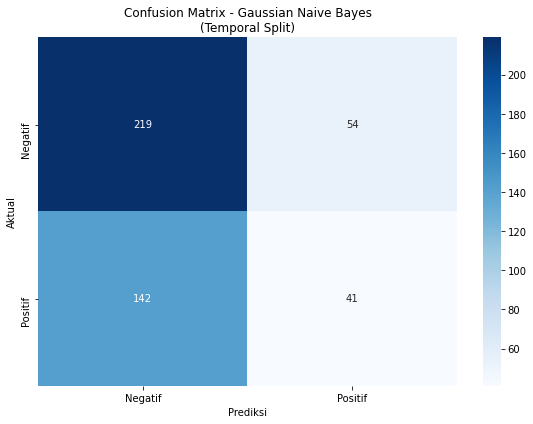

In [ ]:
print("\n=== VISUALISASI HASIL ===")

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif', 'Positif'],
            yticklabels=['Negatif', 'Positif'])
plt.title('Confusion Matrix - Gaussian Naive Bayes\n(Temporal Split)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

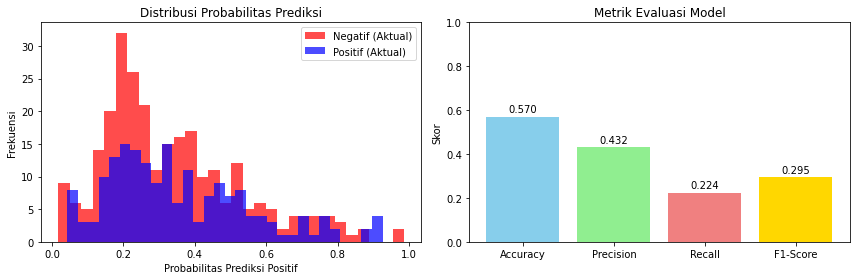

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, label='Negatif (Aktual)', color='red')
plt.hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, label='Positif (Aktual)', color='blue')
plt.xlabel('Probabilitas Prediksi Positif')
plt.ylabel('Frekuensi')
plt.title('Distribusi Probabilitas Prediksi')
plt.legend()

plt.subplot(1, 2, 2)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']

bars = plt.bar(metrics, values, color=colors)
plt.ylim(0, 1)
plt.title('Metrik Evaluasi Model')
plt.ylabel('Skor')

# Tambahkan nilai di atas bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


=== ANALISIS TEMPORAL ===

Performa per bulan pada test set:
  month  n_samples  accuracy  f1_score
2024-08        114  0.491228  0.256410
2024-09         62  0.419355  0.400000
2024-10         81  0.543210  0.274510
2024-11        100  0.630000  0.327273
2024-12         99  0.717172  0.176471


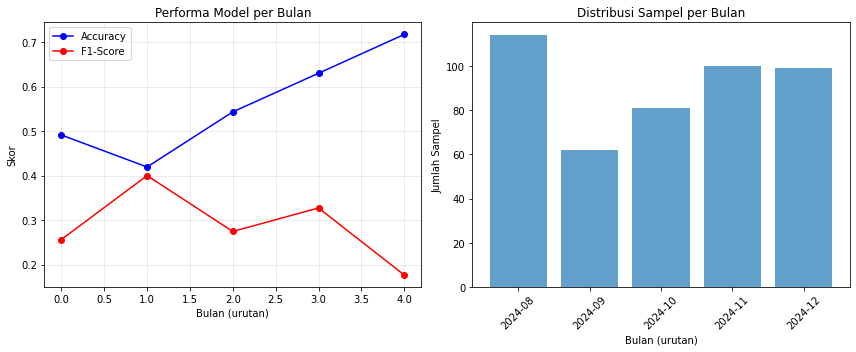

In [ ]:
print("\n=== ANALISIS TEMPORAL ===")

# Analisis performa per bulan pada test set
df_test = df_combined.iloc[split_point:].copy()
df_test['y_true'] = y_test
df_test['y_pred'] = y_pred
df_test['y_pred_proba'] = y_pred_proba
df_test['month_year'] = df_test['date_parsed'].dt.to_period('M')

# Metrik per bulan
monthly_metrics = []
for month in df_test['month_year'].unique():
    month_data = df_test[df_test['month_year'] == month]
    if len(month_data) > 0:
        month_acc = accuracy_score(month_data['y_true'], month_data['y_pred'])
        month_f1 = f1_score(month_data['y_true'], month_data['y_pred'], zero_division=0)

        monthly_metrics.append({
            'month': str(month),
            'n_samples': len(month_data),
            'accuracy': month_acc,
            'f1_score': month_f1
        })

monthly_df = pd.DataFrame(monthly_metrics)
print("\nPerforma per bulan pada test set:")
print(monthly_df.to_string(index=False))

# Plot performa temporal
if len(monthly_df) > 1:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(len(monthly_df)), monthly_df['accuracy'], 'bo-', label='Accuracy')
    plt.plot(range(len(monthly_df)), monthly_df['f1_score'], 'ro-', label='F1-Score')
    plt.xlabel('Bulan (urutan)')
    plt.ylabel('Skor')
    plt.title('Performa Model per Bulan')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.bar(range(len(monthly_df)), monthly_df['n_samples'], alpha=0.7)
    plt.xlabel('Bulan (urutan)')
    plt.ylabel('Jumlah Sampel')
    plt.title('Distribusi Sampel per Bulan')
    plt.xticks(range(len(monthly_df)), [m[:7] for m in monthly_df['month']], rotation=45)

    plt.tight_layout()
    plt.show()

In [ ]:
print("\n=== FUNGSI PREDIKSI UNTUK DATA BARU ===")

def predict_sentiment_new_data(new_embeddings, model, return_proba=False):
    """
    Fungsi untuk memprediksi sentimen pada data baru

    Parameters:
    -----------
    new_embeddings : array-like
        Word embeddings dari berita baru
    model : sklearn model
        Model yang sudah dilatih
    return_proba : bool
        Apakah mengembalikan probabilitas

    Returns:
    --------
    predictions : array
        Prediksi label (0=negatif, 1=positif)
    probabilities : array (opsional)
        Probabilitas untuk kelas positif
    """
    predictions = model.predict(new_embeddings)

    if return_proba:
        probabilities = model.predict_proba(new_embeddings)[:, 1]
        return predictions, probabilities

    return predictions

# Contoh penggunaan pada beberapa sampel test
print(f"\nContoh prediksi pada 5 sampel test pertama:")
sample_predictions, sample_proba = predict_sentiment_new_data(
    X_test[:5], best_gnb, return_proba=True
)

for i in range(5):
    actual = "positif" if y_test[i] == 1 else "negatif"
    predicted = "positif" if sample_predictions[i] == 1 else "negatif"
    confidence = sample_proba[i] if sample_predictions[i] == 1 else (1 - sample_proba[i])

    print(f"  Sampel {i+1}: Aktual={actual}, Prediksi={predicted}, Confidence={confidence:.3f}")

print(f"\nEVALUASI SELESAI!")
print(f"Model terbaik dengan var_smoothing={grid_search.best_params_['var_smoothing']}")
print(f"Akurasi test: {accuracy:.4f}, F1-Score: {f1:.4f}")


=== FUNGSI PREDIKSI UNTUK DATA BARU ===

Contoh prediksi pada 5 sampel test pertama:
  Sampel 1: Aktual=positif, Prediksi=negatif, Confidence=0.616
  Sampel 2: Aktual=negatif, Prediksi=positif, Confidence=0.592
  Sampel 3: Aktual=negatif, Prediksi=negatif, Confidence=0.586
  Sampel 4: Aktual=positif, Prediksi=negatif, Confidence=0.692
  Sampel 5: Aktual=negatif, Prediksi=negatif, Confidence=0.799

EVALUASI SELESAI!
Model terbaik dengan var_smoothing=0.059636233165946365
Akurasi test: 0.5702, F1-Score: 0.2950
